In [8]:
import zipfile
import os
from PIL import Image
import numpy as np

# Step 1: Extract the ZIP file
zip_file_path = 'AnimalDataset.zip'  # Replace with your ZIP file path
extract_dir = 'AnimalExtractedFiles'  # Directory to extract files

# Extract the ZIP file
if not os.path.exists(extract_dir):  # Avoid re-extraction if already done
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)
    print(f"ZIP file extracted to '{extract_dir}'!")
else:
    print(f"Directory '{extract_dir}' already exists. Skipping extraction.")

ZIP file extracted to 'AnimalExtractedFiles'!


In [9]:
# Correct the dataset path
dataset_path = os.path.join(extract_dir, 'raw-img')

# Step 2: Load and preprocess images
image_size = (128, 128)  # Resize all images to 128x128
images = []
labels = []

# Debug: Check if the dataset folder exists
if not os.path.exists(dataset_path):
    print(f"Error: Dataset folder '{dataset_path}' not found!")

# Loop through extracted files
for root, dirs, files in os.walk(dataset_path):
    print(f"Scanning directory: {root}, Found {len(files)} files")  # Debugging line
    for file_name in files:
        if file_name.lower().endswith(('.jpg', '.png', '.jpeg')):  # Support more formats
            file_path = os.path.join(root, file_name)

            try:
                # Load the image
                image = Image.open(file_path).convert('RGB')  

                # Resize the image
                image = image.resize(image_size)

                # Convert the image to a NumPy array
                image_array = np.array(image) / 255.0  
                images.append(image_array)

                # Extract label from folder name
                label = os.path.basename(root)  
                labels.append(label)
            except Exception as e:
                print(f"Error loading image {file_path}: {e}")

# Convert to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Step 3: Print dataset summary
if len(images) > 0:
    print(f"Total images loaded: {len(images)}")
    print(f"Image shape: {images[0].shape} (Each image is resized to {image_size})")
    print(f"Unique labels: {set(labels)}")
else:
    print("No images were loaded. Check the dataset path and file formats.")

Scanning directory: AnimalExtractedFiles/raw-img, Found 0 files
Scanning directory: AnimalExtractedFiles/raw-img/gallina, Found 3098 files
Scanning directory: AnimalExtractedFiles/raw-img/ragno, Found 4821 files
Scanning directory: AnimalExtractedFiles/raw-img/gatto, Found 1668 files
Scanning directory: AnimalExtractedFiles/raw-img/farfalla, Found 2112 files
Scanning directory: AnimalExtractedFiles/raw-img/mucca, Found 1866 files
Scanning directory: AnimalExtractedFiles/raw-img/cavallo, Found 2623 files
Scanning directory: AnimalExtractedFiles/raw-img/cane, Found 4863 files
Scanning directory: AnimalExtractedFiles/raw-img/pecora, Found 1820 files
Scanning directory: AnimalExtractedFiles/raw-img/scoiattolo, Found 1862 files
Scanning directory: AnimalExtractedFiles/raw-img/elefante, Found 1446 files
Total images loaded: 26179
Image shape: (128, 128, 3) (Each image is resized to (128, 128))
Unique labels: {np.str_('elefante'), np.str_('gatto'), np.str_('cane'), np.str_('scoiattolo'), np.s

In [13]:
import tensorflow as tf

# Correct dataset folder path
dataset_folder = "AnimalExtractedFiles/raw-img"  # Ensure this points to the folder with class subdirectories

# Load training dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_folder,
    validation_split=0.2,   # Use 20% of data for validation
    subset="training",      # Load training subset
    seed=123,               # Seed for reproducibility
    image_size=(128, 128),  # Resize images to 128x128
    batch_size=32           # Batch size
)

# Load validation dataset
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_folder,
    validation_split=0.2,   # Use the same split percentage
    subset="validation",    # Load validation subset
    seed=123,
    image_size=(128, 128),
    batch_size=32
)
# Display class names detected
print(f"Class names: {train_dataset.class_names}")

Matplotlib is building the font cache; this may take a moment.


Found 26179 files belonging to 10 classes.
Using 20944 files for training.
Found 26179 files belonging to 10 classes.
Using 5235 files for validation.
Class names: ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']


In [14]:
import tensorflow as tf

# Directory where the dataset is located (same directory as notebook)
dataset_folder = "AnimalExtractedFiles/raw-img"  # folder name

# Load and resize dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_folder,
    image_size=(128, 128),  # Resize images to 128x128
    batch_size=32           # Number of images per batch
)

# Display dataset information
print(f"Dataset loaded with class names: {dataset.class_names}")

# Verify resizing
for images, labels in dataset.take(1):
    print(f"Batch image shape: {images.shape}")

Found 26179 files belonging to 10 classes.
Dataset loaded with class names: ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']
Batch image shape: (32, 128, 128, 3)


2025-02-07 00:30:25.817835: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


2025-02-07 00:30:25.861038: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


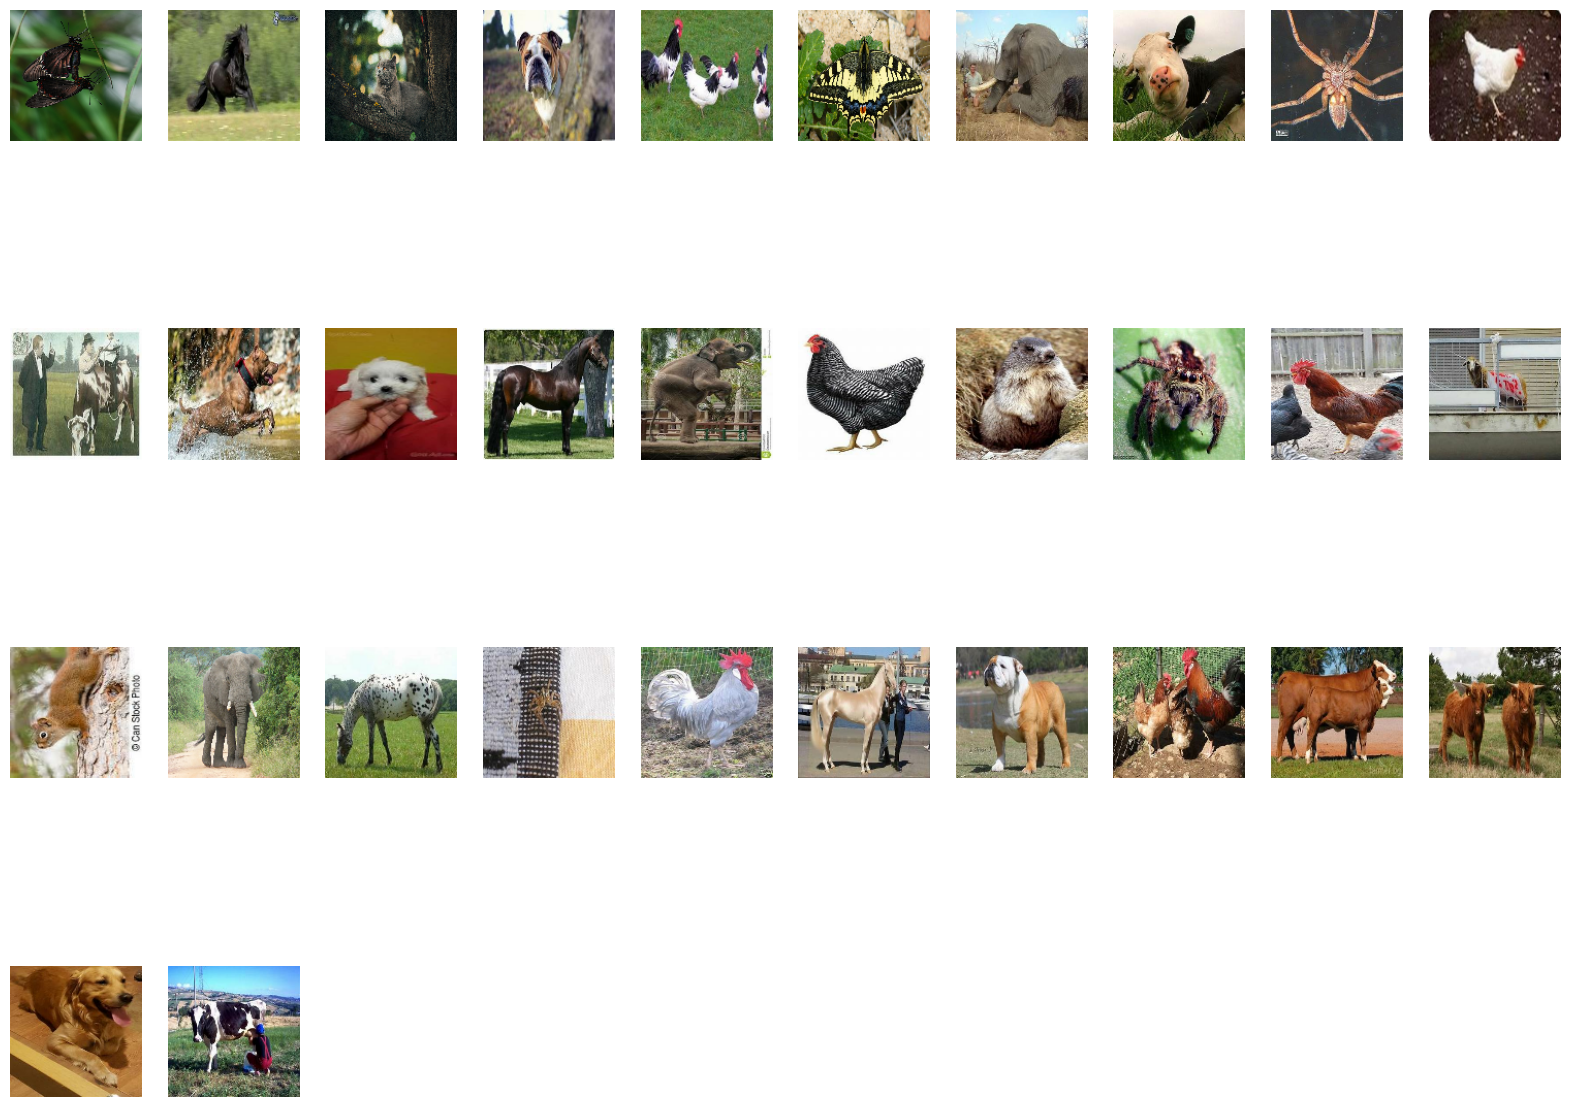

2025-02-07 00:30:26.580214: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [15]:
import matplotlib.pyplot as plt

# Display resized images
for images, labels in train_dataset.take(1):  # Take one batch from the dataset
    plt.figure(figsize=(20, 20))
    
    num_images = min(50, images.shape[0])  # Ensure we don't exceed batch size
    for i in range(num_images):  # Loop over available images
        plt.subplot(5, 10, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")
    
    plt.show()

In [17]:
import tensorflow as tf

# Load dataset from a directory
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "AnimalExtractedFiles/raw-img",  # Replace with your dataset directory
    image_size=(128, 128),  # Resize images to 128x128
    batch_size=32          # Specify batch size
)

# Normalize pixel values in the dataset
normalized_dataset = dataset.map(lambda x, y: (x / 255.0, y))

# Verify normalization
for images, labels in normalized_dataset.take(1):
    print(f"Image pixel range: {tf.reduce_min(images)} to {tf.reduce_max(images)}")

Found 26179 files belonging to 10 classes.
Image pixel range: 0.0 to 1.0


2025-02-07 00:33:53.097550: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


In [18]:
def handle_color_channels(image, label):
    # Split the color channels
    red_channel = image[:, :, :, 0]  # Red channel
    green_channel = image[:, :, :, 1]  # Green channel
    blue_channel = image[:, :, :, 2]  # Blue channel

    # Example: Set the Red channel to zero
    red_channel = tf.zeros_like(red_channel)

    # Stack the modified channels back together
    image = tf.stack([red_channel, green_channel, blue_channel], axis=-1)

    # Return the processed image and label
    return image, label

In [19]:
# Apply the handle_color_channels function to the dataset
processed_dataset = dataset.map(handle_color_channels)

# Prefetch the dataset to optimize performance
processed_dataset = processed_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..248.2815].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..254.89233].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..252.54346].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


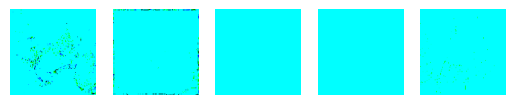

2025-02-07 00:34:02.559937: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [20]:
# Visualize a few images from the processed dataset
for images, labels in processed_dataset.take(1):  # Take one batch
    for i in range(5):  # Show the first 5 images
        plt.subplot(1, 5, i + 1)
        plt.imshow(images[i].numpy().astype("float32"))
        plt.axis('off')
    plt.show()

In [29]:
import collections

# Convert Tensor labels to a NumPy array, then to a list
labels_list = labels.numpy().tolist()

# Count class occurrences
class_counts = collections.Counter(labels_list)

print("Class distribution:", class_counts)


Class distribution: Counter({4: 7, 8: 7, 1: 7, 0: 5, 6: 2, 3: 2, 9: 1, 7: 1})


Found 26179 files belonging to 10 classes.


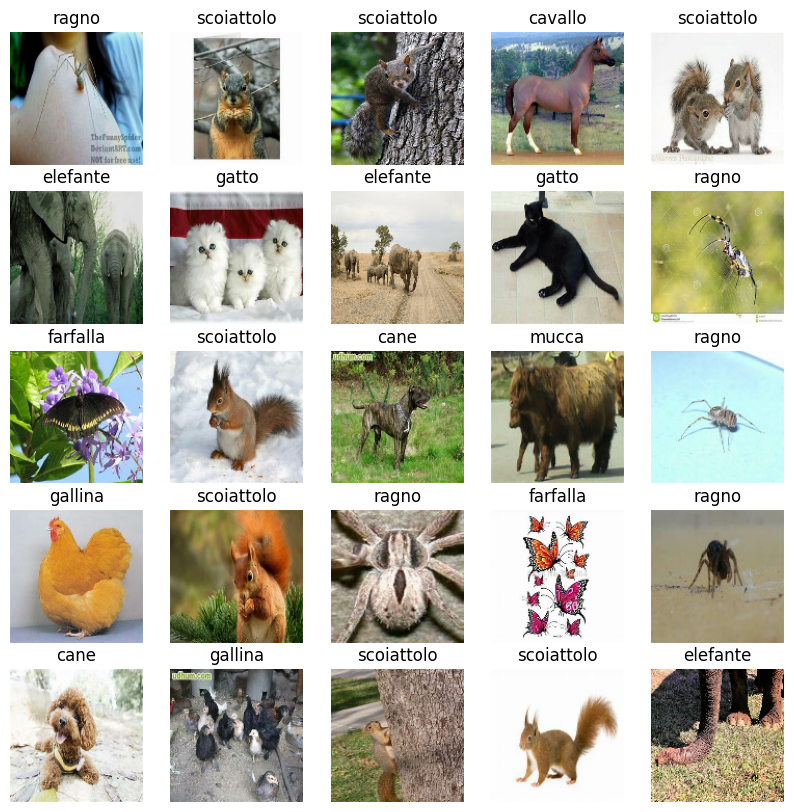

In [40]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "AnimalExtractedFiles/raw-img",
    image_size=(128, 128),
    batch_size=32
)

# Get class names
class_names = dataset.class_names

# Display sample images from different classes
plt.figure(figsize=(10, 10))
for images, labels in dataset.take(1):  # Take a single batch
    for i in range(25):  # Show 25 images
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i].numpy()])
        plt.axis("off")
plt.show()

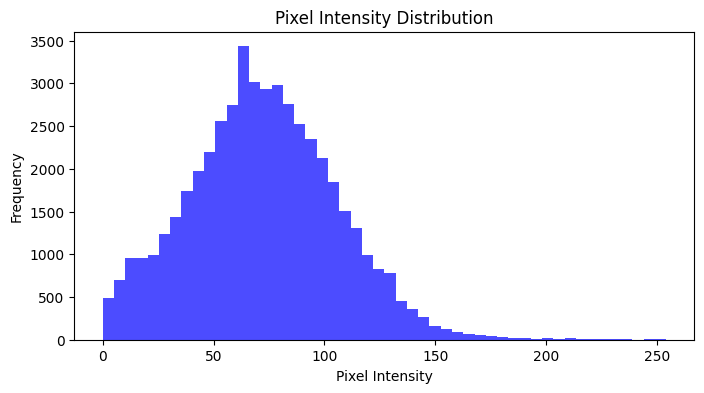

In [41]:
# Get one batch of images
for images, _ in dataset.take(1):
    image_sample = images[0].numpy().astype("uint8")

# Flatten image to 1D for histogram
pixel_values = image_sample.flatten()

# Plot histogram
plt.figure(figsize=(8, 4))
plt.hist(pixel_values, bins=50, color='blue', alpha=0.7)
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.title("Pixel Intensity Distribution")
plt.show()


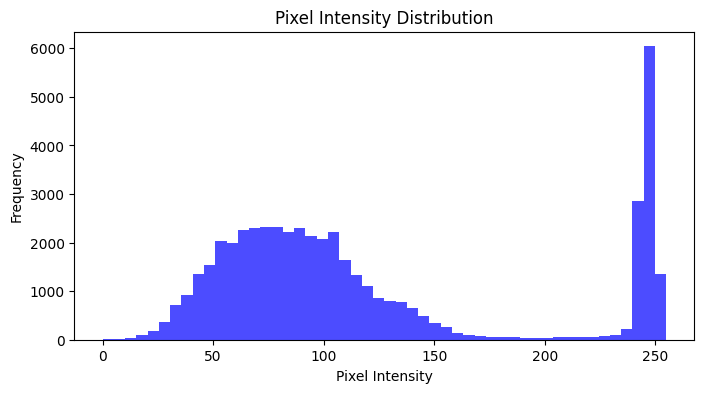

In [43]:
# Get one batch of images
for images, _ in dataset.take(1):
    image_sample = images[0].numpy().astype("uint8")

# Flatten image to 1D for histogram
pixel_values = image_sample.flatten()

# Plot histogram
plt.figure(figsize=(8, 4))
plt.hist(pixel_values, bins=50, color='blue', alpha=0.7)
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.title("Pixel Intensity Distribution")
plt.show()
